In [ ]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
# define location of dataset



folder = 'dogvscat/'

In [ ]:
!wget -O /content/dogvscat.zip https://www.cse.fau.edu/~xqzhu/dogvscat.zip

!unzip /content/dogvscat.zip

--2024-05-22 17:51:13--  https://www.cse.fau.edu/~xqzhu/dogvscat.zip
Resolving www.cse.fau.edu (www.cse.fau.edu)... 131.91.168.76
Connecting to www.cse.fau.edu (www.cse.fau.edu)|131.91.168.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67933569 (65M) [application/zip]
Saving to: ‘/content/dogvscat.zip’

/content/dogvscat.z 100%[===================>]  64.79M  66.7MB/s    in 1.0s    

2024-05-22 17:51:14 (66.7 MB/s) - ‘/content/dogvscat.zip’ saved [67933569/67933569]

Archive:  /content/dogvscat.zip
   creating: dogvscat/
   creating: dogvscat/test/
   creating: dogvscat/test/cats/
  inflating: dogvscat/test/cats/cat.1501.jpg  
  inflating: dogvscat/test/cats/cat.1502.jpg  
  inflating: dogvscat/test/cats/cat.1503.jpg  
  inflating: dogvscat/test/cats/cat.1504.jpg  
  inflating: dogvscat/test/cats/cat.1505.jpg  
  inflating: dogvscat/test/cats/cat.1506.jpg  
  inflating: dogvscat/test/cats/cat.1507.jpg  
  inflating: dogvscat/test/cats/cat.1508.jpg  
  infla

In [ ]:
import os
def displayImages(foldername,dogorcat,startID):
    # plot first few images
    for i in range(9):
        #define subplot 3x3
        pyplot.subplot(330 + 1 + i)
        # define filename
        filename = foldername + dogorcat +'.' + str(i+startID) + '.jpg'
        # load image pixels
        image = imread(filename)
        # plot raw pixel data
        pyplot.imshow(image)
        # show the figure
pyplot.show()

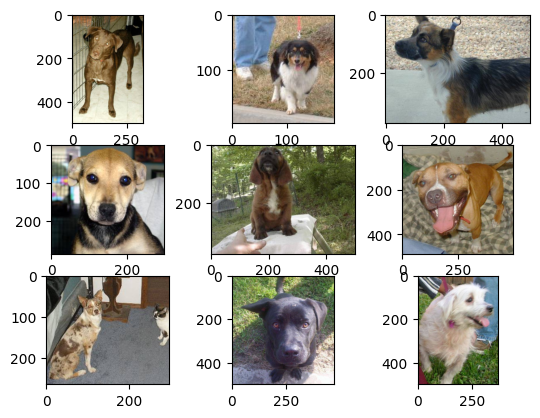

In [ ]:
displayImages(os.path.join(folder,"train/dog/"),"dog",1)

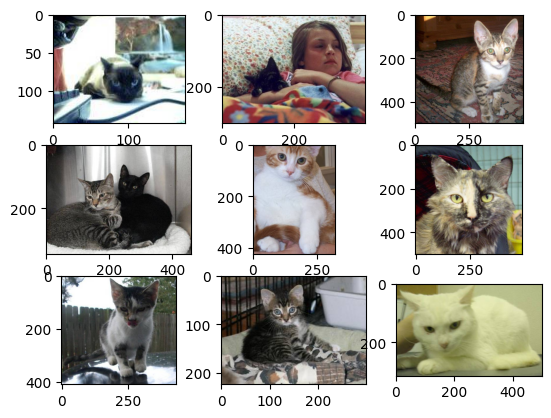

In [ ]:
displayImages(folder+"train/cat/","cat",5)

In [ ]:
training_data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# for tensoflow 2.9 or later, use following code
os.mkdir('preview')
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
img = load_img(folder+'train/dog/dog.1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in training_data_generator.flow(x, batch_size=1, save_to_dir='preview', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely

In [ ]:
training_data_dir=folder+'train/'
validation_data_dir=folder+'validation/'
test_data_dir=folder+'test/'
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=20
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),activation="relu",input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3)))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
EPOCHS=30
history=model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)

<ipython-input-10-d9bcd208dd87>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/30
50/50 [==============================] - 39s 749ms/step - loss: 0.7290 - accuracy: 0.5050 - val_loss: 0.6822 - val_accuracy: 0.5960
Epoch 2/30
50/50 [==============================] - 33s 652ms/step - loss: 0.6883 - accuracy: 0.5350 - val_loss: 0.6748 - val_accuracy: 0.5050
Epoch 3/30
50/50 [==============================] - 34s 672ms/step - loss: 0.6778 - accuracy: 0.6030 - val_loss: 0.6582 - val_accuracy: 0.5780
Epoch 4/30
50/50 [==============================] - 33s 660ms/step - loss: 0.6582 - accuracy: 0.6180 - val_loss: 0.6455 - val_accuracy: 0.6120
Epoch 5/30
50/50 [==============================] - 36s 727ms/step - loss: 0.6524 - accuracy: 0.6260 - val_loss: 0.6316 - val_accuracy: 0.6360
Epoch 6/30
50/50 [==============================] - 33s 664ms/step - loss: 0.6517 - accuracy: 0.6260 - val_loss: 0.6255 - val_accuracy: 0.6390
Epoch 7/30
50/50 [==============================] - 33s 668ms/step - loss: 0.6456 - accuracy: 0.6220 - val_loss: 0.6192 - val_accuracy: 0.6610

In [ ]:
_, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)
print('Test Accuracy: %.3f%%' % (acc * 100.0))

<ipython-input-11-9d0084e8b089>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=0)


Test Accuracy: 70.700%


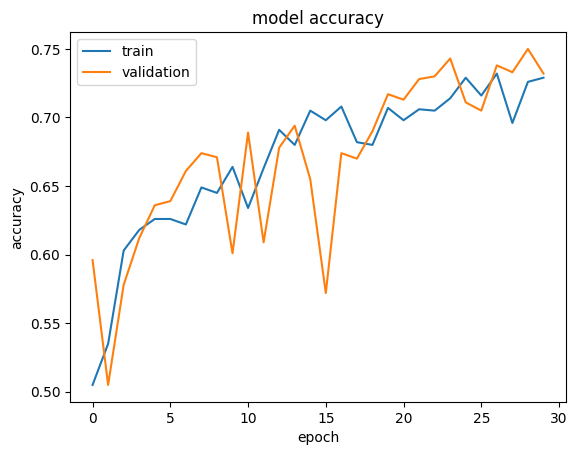

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<ipython-input-13-6b691f9c98db>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(test_generator, numtestimages)


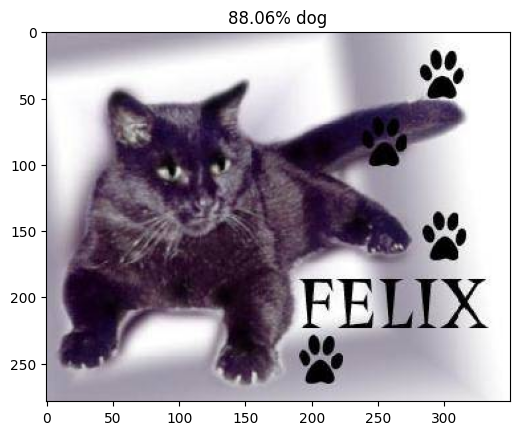

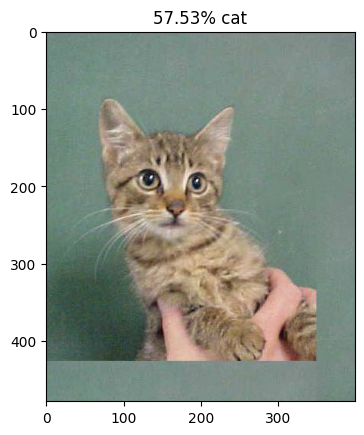

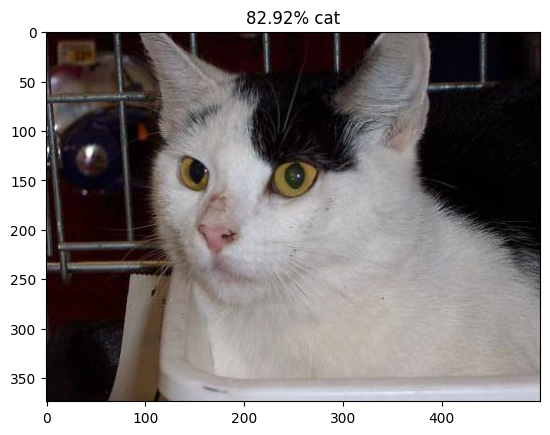

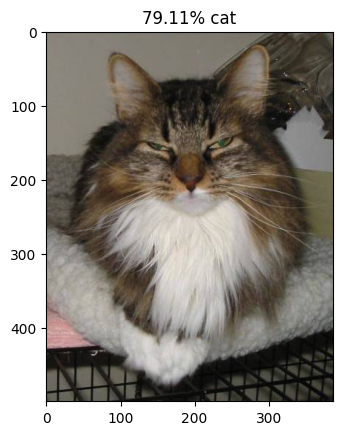

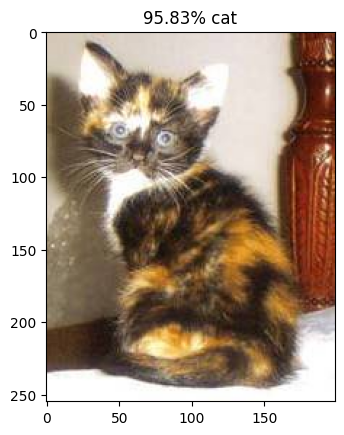

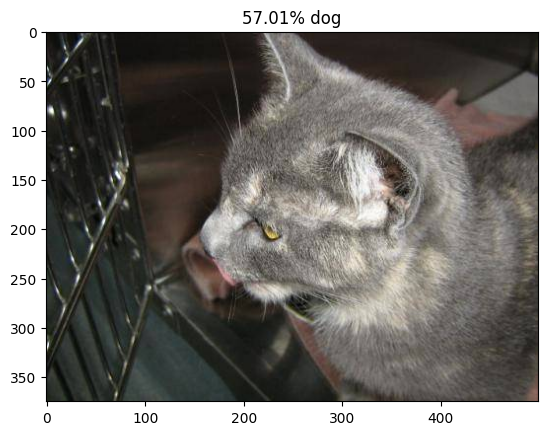

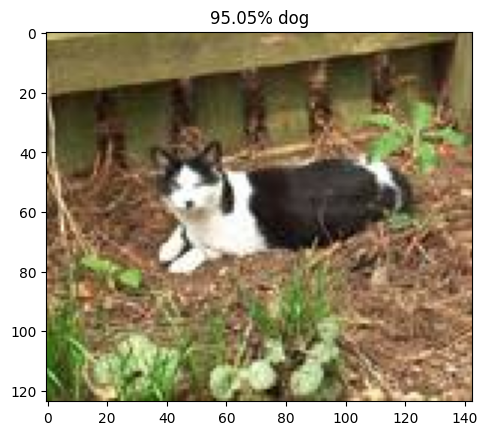

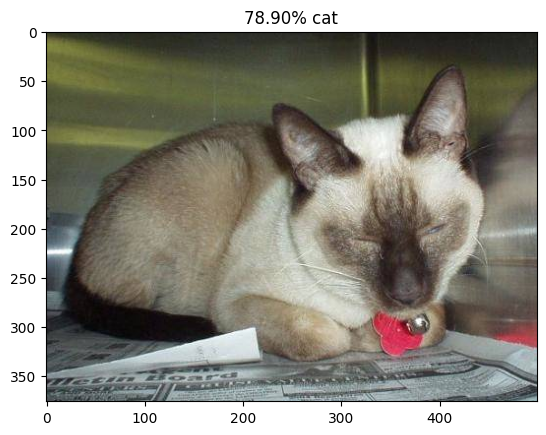

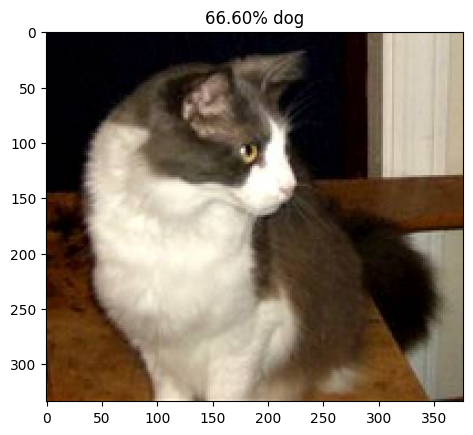

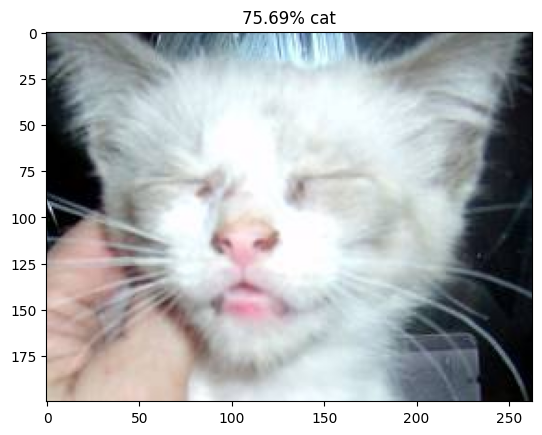

In [ ]:
outputfile='output.txt'
numtestimages=10
open(outputfile,"w")
probabilities = model.predict_generator(test_generator, numtestimages)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = imread(image_path)
    with open(outputfile,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    pyplot.imshow(img)
    if probability > 0.5:
        pyplot.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        pyplot.title("%.2f" % ((1-probability[0])*100) + "% cat")
    pyplot.show()